In [2]:
import numpy as np
import matplotlib.pyplot as plt


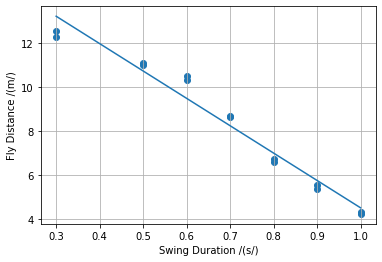

slope:  -12.436065573770499
b:  16.954016393442625


In [11]:

#swing duration
inputs = np.array([1.0,1.0, 0.9, 0.9, 0.8, 0.8, 0.7, 0.7, 0.6, 0.6, 0.5, 0.5, 0.3, 0.3])

#fly distance
outputs = np.array([4.33, 4.24, 5.38,5.54, 6.73, 6.62, 8.63, 8.70, 10.33, 10.50, 11.12,11.01, 12.3, 12.54])

m, b = np.polyfit(inputs, outputs, 1)

plt.scatter(inputs, outputs)
plt.plot(inputs, m*inputs + b)
plt.grid()

plt.xlabel("Swing Duration /(s/)")
plt.ylabel("Fly Distance /(m/)")
plt.show()


print("slope: ", m)
print("b: ", b)